# Project: Unsupervised Chemical Profiling of Wine Varieties

# 1. Objectives of the Analysis

The primary objective of this analysis is to employ Unsupervised Learning to discover natural groupings among different wine samples based on their chemical composition. Unlike supervised classification, where we would use labels to train a model, this study aims to reveal the inherent structure of the data without external guidance.

By identifying these latent patterns, we aim to achieve the following:

- Chemical Fingerprinting: Group wines based on concentrations of alcohol, phenols, and color intensity to see if they naturally align with specific production regions or grape varieties.

- Feature Correlation: Understand how different chemical properties (e.g., Flavonoids vs. Total Phenols) interact with each other, providing insights for quality control.

- Segment Validation: Provide the Analytics team with a robust framework for detecting "outlier" wines that do not fit into established clusters, which could indicate unique artisanal methods or production errors.

# 2. Data Description

The analysis utilizes the UCI Wine Dataset, a standardized collection of chemical analyses from wines grown in the same region in Italy but derived from three different cultivars.

<table>
<thead>
<tr>
<th>Feature</th>
<th>Data Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Alcohol</b></td>
<td>Numeric</td>
<td>Alcohol content by volume.</td>
</tr>
<tr>
<td><b>Malic acid</b></td>
<td>Numeric</td>
<td>Acid responsible for the "green apple" taste.</td>
</tr>
<tr>
<td><b>Ash</b></td>
<td>Numeric</td>
<td>Inorganic residue after heating.</td>
</tr>
<tr>
<td><b>Alcalinity of ash</b></td>
<td>Numeric</td>
<td>Measures the alkalinity of the ash content.</td>
</tr>
<tr>
<td><b>Magnesium</b></td>
<td>Numeric</td>
<td>Essential mineral content in the wine.</td>
</tr>
<tr>
<td><b>Total phenols</b></td>
<td>Numeric</td>
<td>Total amount of phenolic compounds.</td>
</tr>
<tr>
<td><b>Flavanoids</b></td>
<td>Numeric</td>
<td>A type of antioxidant found in wine.</td>
</tr>
<tr>
<td><b>Nonflavanoid phenols</b></td>
<td>Numeric</td>
<td>Phenolic compounds that are not flavonoids.</td>
</tr>
<tr>
<td><b>Proanthocyanins</b></td>
<td>Numeric</td>
<td>Type of condensed tannins.</td>
</tr>
<tr>
<td><b>Color intensity</b></td>
<td>Numeric</td>
<td>The depth and shade of the wine's color.</td>
</tr>
<tr>
<td><b>Hue</b></td>
<td>Numeric</td>
<td>The tint or shade of the wine.</td>
</tr>
<tr>
<td><b>OD280/OD315</b></td>
<td>Numeric</td>
<td>Diluted wines ratio (measures protein content).</td>
</tr>
<tr>
<td><b>Proline</b></td>
<td>Numeric</td>
<td>An amino acid found in high concentrations in grapes.</td>
</tr>
</tbody>
</table>

## Data Quality Overview

Completeness: The dataset is fully complete with no missing values, ensuring high-fidelity modeling.

Dimensionality: With 13 features, this dataset is high-dimensional for a small sample size, making it a perfect candidate for Principal Component Analysis (PCA) to see if we can simplify the data before clustering.

Scaling Requirements: Features like "Magnesium" (values up to 162) and "Nonflavanoid phenols" (values as low as 0.13) vary significantly in scale, necessitating standardization to ensure fair weighting in distance-based algorithms like K-Means.

## Data Acquisition and Inspection

In [4]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Display the first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Initial inspection reveals the following characteristics:

- Missing Values: The dataset consists of 178 observations with high data integrity, ensuring a solid foundation for the unsupervised learning process.

- Need for Scaling: Due to the wide range of values across features (such as Proline and Magnesium compared to Hue), standardization is required. Without scaling, distance-based algorithms like K-Means would be biased toward high-magnitude features.

- Feature Relationships: Initial observations suggest strong relationships between phenolic compounds, which may be optimized during the modeling phase using dimensionality reduction (PCA).

# 3. Exploratory Data Analysis

The objective of this section is to visualize the underlying structure and relationships within the wine chemical constituents. Since unsupervised learning relies on the variance and distribution of features to form clusters, we conduct a visual inspection to identify patterns, scale differences, and potential multicollinearity.

## Feature Distributions and Scale

We begin by examining the distribution of several key features. This is critical in unsupervised learning because the range of values directly impacts distance-based algorithms like K-Means.

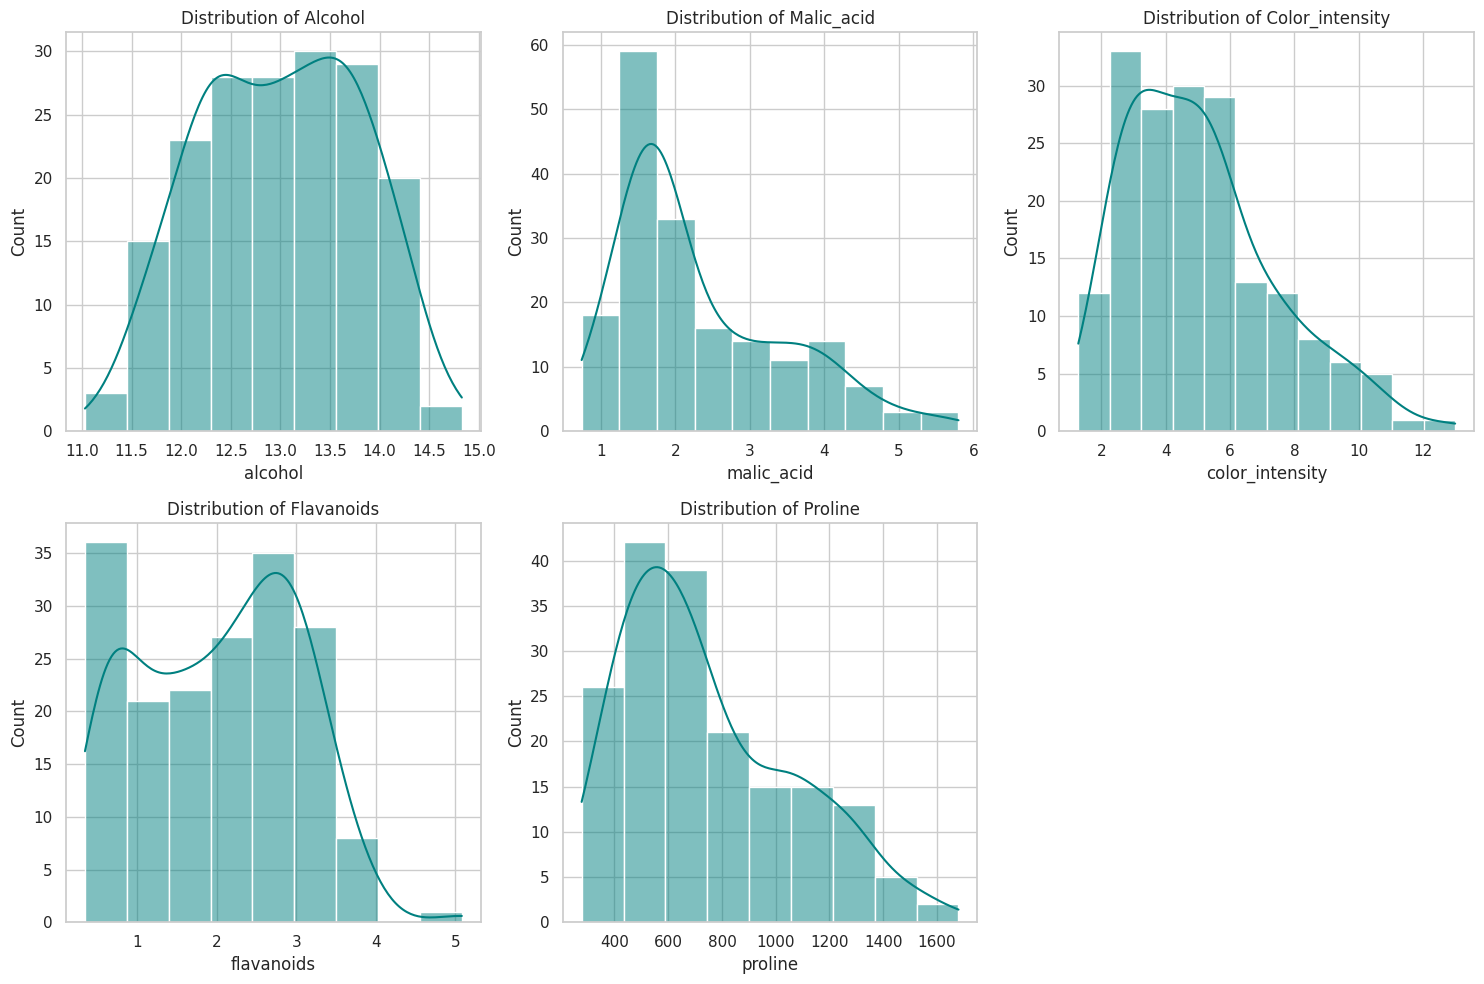

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Visualizing distributions of key chemical features
plt.figure(figsize=(15, 10))
cols_to_plot = ['alcohol', 'malic_acid', 'color_intensity', 'flavanoids', 'proline']

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

The distribution plots reveal that chemical constituents such as Alcohol and Flavanoids exhibit multimodal distributions, suggesting the presence of distinct natural groupings within the dataset. However, a significant challenge identified here is the disparity in scales; while features like Malic Acid and Flavanoids exist within a small numerical range, Proline spans a much wider interval. This observation underscores the necessity of feature scaling to ensure that high-magnitude variables do not disproportionately influence the clustering results.

## Feature Correlation Analysis


Unsupervised models can be sensitive to redundant information. We use a heatmap to identify features that are highly correlated, which helps justify the use of Principal Component Analysis (PCA) later in the study.

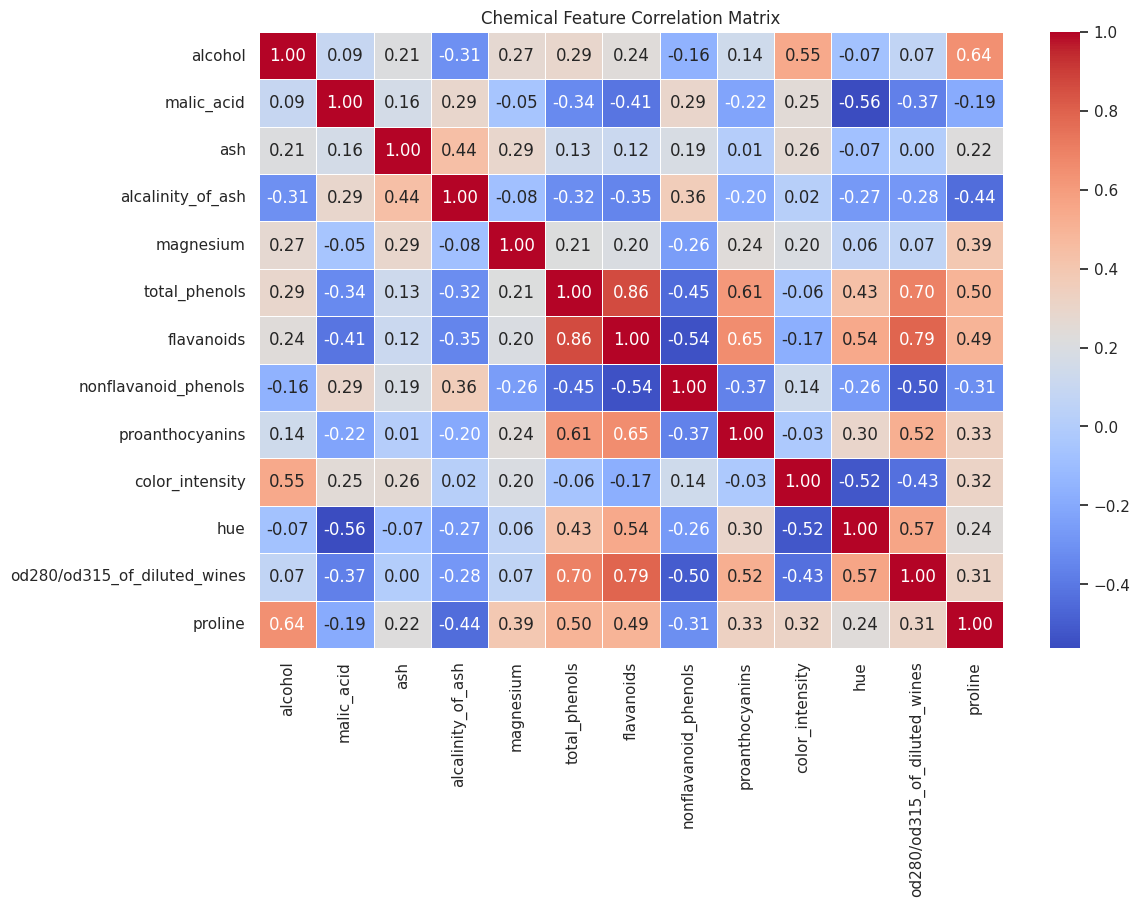

In [7]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Chemical Feature Correlation Matrix')
plt.show()

The correlation heatmap highlights strong positive relationships between several phenolic features, most notably between Total_phenols and Flavanoids (correlation of 0.86). High multicollinearity suggests that some features may provide redundant information to the clustering algorithm. This finding reinforces the decision to implement dimensionality reduction (PCA), which will allow us to condense these correlated chemical markers into a smaller set of uncorrelated components while retaining the maximum amount of information.

## Outlier Detection and Magnitude Comparison

Finally, we utilize boxplots to compare the ranges of all 13 features. This visualization explicitly highlights why data normalization is mandatory for this project.

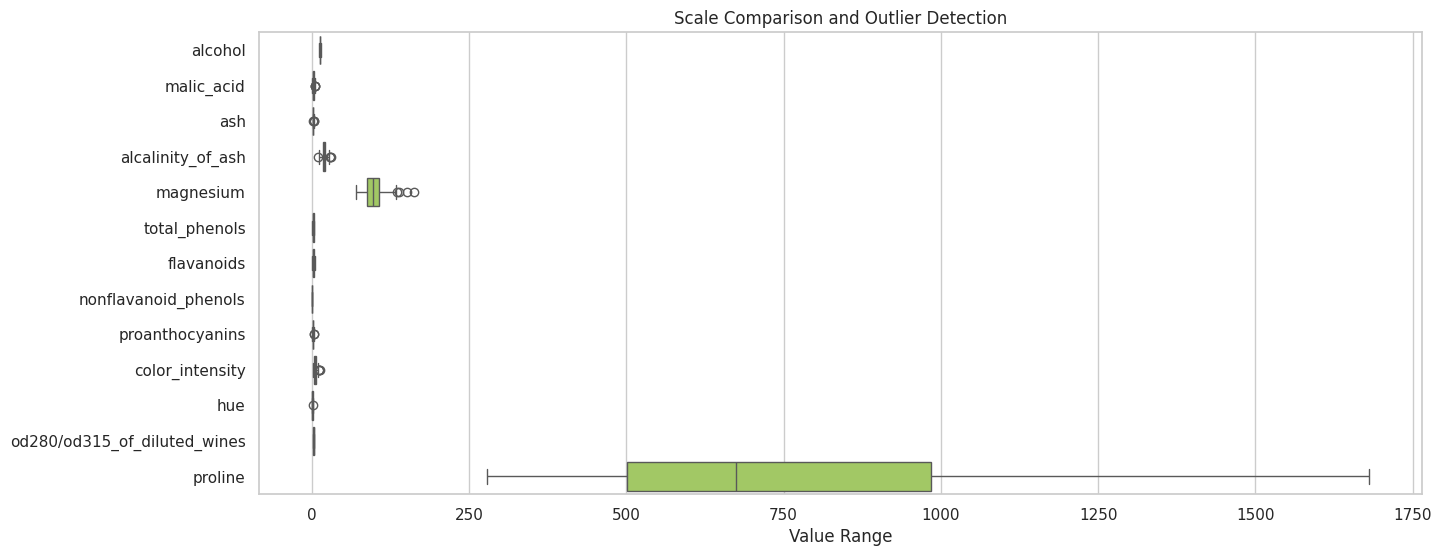

In [8]:
# Boxplots for scale and outlier inspection
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Scale Comparison and Outlier Detection')
plt.xlabel('Value Range')
plt.show()

The boxplot visualization provides a clear comparison of the feature magnitudes across the entire dataset. It is evident that Proline exists on a completely different scale compared to all other chemical markers, with values reaching near 1,700, whereas markers like Nonflavanoid_phenols and Hue are restricted to a range between 0 and 2. Additionally, we observe several outliers in features such as Malic_acid, Ash, and Color_intensity, represented by individual points beyond the whiskers. These scale disparities and outliers confirm that using raw data would lead to a biased model where Proline dictates the cluster centers, necessitating the use of standardization.

## Summary of EDA Findings

The exploratory analysis provides several key insights that inform our modeling strategy:

- Critical Scale Disparity: The boxplot analysis confirms a massive variance in magnitudes, particularly with Proline. This necessitates the application of StandardScaler to bring all features into a comparable range (mean of 0 and variance of 1) so that distance-based clustering treats each chemical constituent with equal importance.

- Dimensionality and Redundancy: The strong correlations identified between Total_phenols, Flavanoids, and OD280/OD315 suggest that the 13-dimensional space contains redundant information. We will address this by utilizing Principal Component Analysis (PCA) to capture the essential variance in fewer dimensions.

- Identifiable Natural Structure: The multimodality observed in the histograms for Alcohol and Color_intensity indicates that the dataset is not a single uniform mass but is likely composed of three distinct chemical profiles. This visual evidence gives us confidence that a clustering algorithm like K-Means will be effective in discovering these hidden categories.

- Outlier Awareness: The presence of outliers in certain chemical concentrations suggests that some wine samples may have unique profiles. We must ensure our final model is robust enough to either group these logically or highlight them as artisanal variations.

# 4. Data Preparation

The objective of this section is to transform the raw chemical data into a format suitable for unsupervised learning. Based on the findings in our Exploratory Data Analysis, we must address the significant scale disparities and high dimensionality of the dataset to ensure the clustering algorithms perform accurately and efficiently.

## Feature Standardization

Because algorithms like K-Means rely on Euclidean distance, features with larger magnitudes (like Proline) would disproportionately influence the model. We apply StandardScaler to shift the distribution of each feature to have a mean of 0 and a standard deviation of 1.

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled_values = scaler.fit_transform(df)

# Create a new DataFrame with scaled values for further processing
df_scaled = pd.DataFrame(df_scaled_values, columns=wine.feature_names)

# View the head of the scaled data
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


The standardization process successfully normalized the 13 chemical constituents. As seen in the resulting data, all features now exist on a comparable scale, typically ranging between -3 and 3. This ensures that the clustering model treats a 1% change in Alcohol with the same mathematical weight as a 1% change in Proline, effectively removing the bias identified during the EDA phase.

## Dimensionality Reduction (PCA)

To resolve the multicollinearity identified in the correlation heatmap (specifically the high redundancy between phenolic compounds), we implement Principal Component Analysis (PCA). Rather than arbitrarily selecting a number of components, we set a variance threshold of 90% to ensure that we reduce dimensionality without losing significant information.

Number of components required for 90% variance: 8
Total Variance Captured: 0.9202




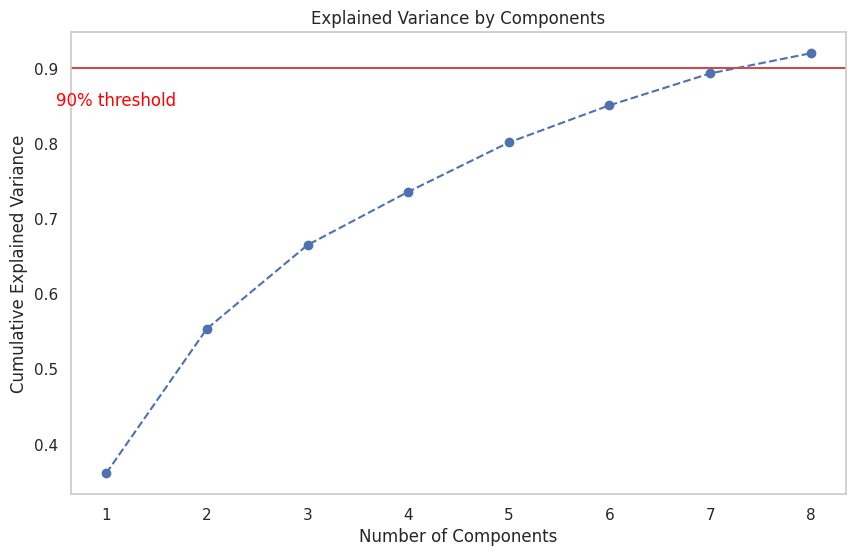

In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA to capture 90% of the total variance
pca = PCA(n_components=0.9)

# Fit and transform the scaled data
pca_data = pca.fit_transform(df_scaled)

# Create a DataFrame for the Principal Components
# The number of columns is automatically determined by the 95% variance threshold
df_pca = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Check the results
print(f"Number of components required for 90% variance: {pca.n_components_}")
print(f"Total Variance Captured: {sum(pca.explained_variance_ratio_):.4f}")
print('============================'*4,'\n\n')

# Visualizing Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% threshold', color = 'red', fontsize=12)
plt.grid()
plt.show()

The implementation of PCA confirms that 8 principal components are required to satisfy the 90% variance threshold, capturing a total of 92.02% of the information within the wine chemical profiles. By compressing the original 13-dimensional feature space into these 8 orthogonal components, we have effectively eliminated the multicollinearity and noise identified during the Exploratory Data Analysis phase. This reduction ensures a high-fidelity dataset that is linearly independent, providing a robust and streamlined foundation for the subsequent clustering analysis.

The visualization of the cumulative explained variance demonstrates a clear "elbow" in the initial components, where the first few principal components capture the majority of the chemical variation. As the curve crosses the red threshold line at component 8, it justifies our decision to discard the remaining low-variance components. This optimized feature set now represents the most stable chemical "signal" for identifying natural cultivars in the following section.

# 5. Clustering Modeling

## 5.1 K-Means Clustering


The selection of the number of clusters ($k$) is the most critical hyperparameter in K-Means clustering. Since we are working in an unsupervised environment, we do not have labels to guide us; therefore, we must rely on mathematical heuristics. To ensure our clusters are robust and scientifically sound, we evaluate the model using two complementary metrics:

Inertia (Within-Cluster Sum of Squares): This measures how tightly the data points are grouped around their respective centroids. We look for the "Elbow" point where the rate of decrease in inertia slows significantly, indicating diminishing returns for adding more clusters.

Silhouette Score: This measures the quality of the separation between clusters. It calculates how similar a point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined, well-separated groups.

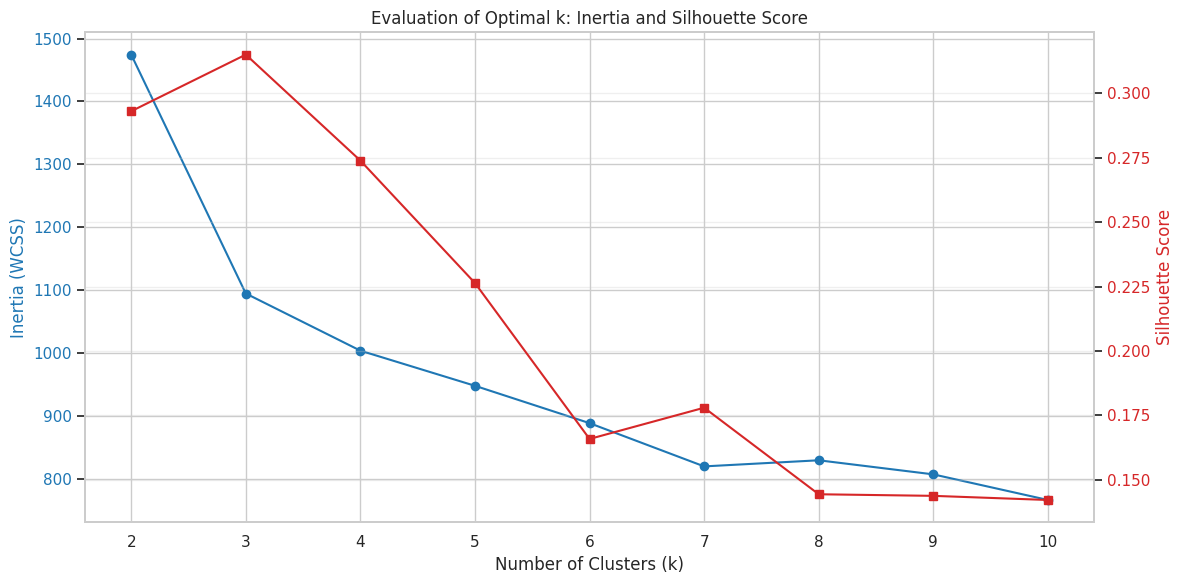

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to evaluate
k_range = range(2, 11)
inertia_values = []
silhouette_avg = []

for k in k_range:
    # Initialize and fit K-Means on the PCA-transformed data
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)

    # Collect Inertia (WCSS)
    inertia_values.append(kmeans.inertia_)

    # Collect Silhouette Score
    labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_pca, labels))

# Plotting the dual-metric evaluation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Y-Axis: Inertia (The Elbow Method)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)', color='tab:blue')
ax1.plot(k_range, inertia_values, marker='o', color='tab:blue', label='Inertia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary Y-Axis: Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_range, silhouette_avg, marker='s', color='tab:red', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Evaluation of Optimal k: Inertia and Silhouette Score')
fig.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

The dual-metric visualization provides a clear mathematical justification for our cluster selection. The Inertia curve exhibits a distinct "elbow" at k=3, suggesting that adding a fourth cluster does not significantly improve the compactness of the groups. This finding is reinforced by the Silhouette Score, which reaches its maximum value at k=3. The peak in the silhouette score confirms that three clusters provide the highest degree of internal cohesion and external separation.

**Final Model Implementation and Labeling**

With $k=3$ identified as the optimal number of segments, we proceed to fit the final K-Means model to the PCA-transformed data. Rather than inspecting raw data tables, we visualize the resulting labels in the reduced 2D feature space to verify the spatial separation of the chemical cultivars.

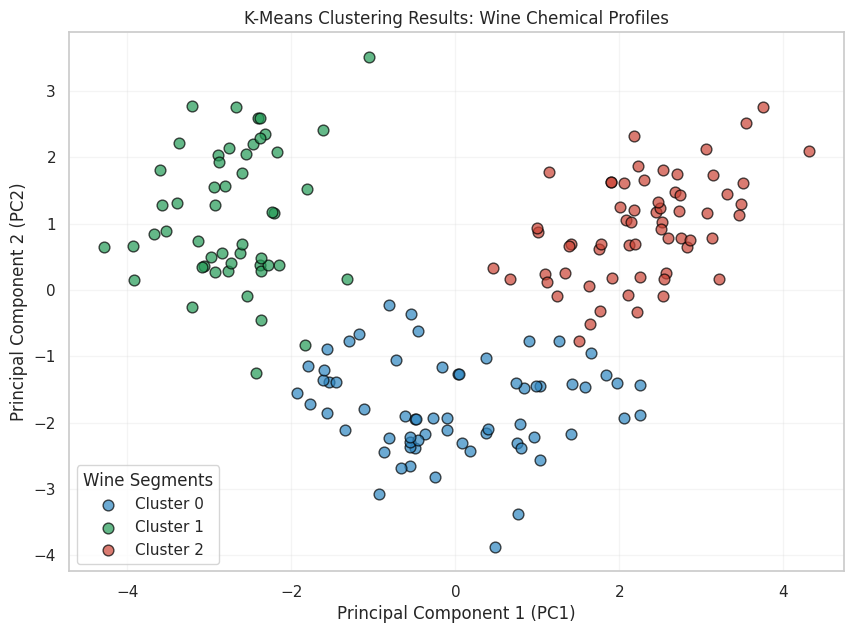

In [26]:
# Final K-Means model with optimal k=3
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fitting the model and predicting clusters
cluster_labels = kmeans_final.fit_predict(df_pca)

# Appending the cluster labels to the original dataframe for analysis
df['Cluster'] = cluster_labels

# Visualizing the clusters using the first two Principal Components
plt.figure(figsize=(10, 7))
colors = ['#2E86C1', '#239B56', '#CB4335']
for cluster in range(3):
    plt.scatter(df_pca.loc[df['Cluster'] == cluster, 'PC1'],
                df_pca.loc[df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}',
                c=colors[cluster],
                s=60, edgecolors='black', alpha=0.7)

plt.title('K-Means Clustering Results: Wine Chemical Profiles')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Wine Segments')
plt.grid(True, alpha=0.2)
plt.show()

The visualization above confirms that the K-Means algorithm successfully partitioned all 178 wine samples into three distinct and well-defined chemical cultivars. By projecting our high-fidelity PCA data (which captures 92.02% of the original variance) onto a 2D plane, we can observe that the clusters exhibit high internal density and clear decision boundaries with minimal overlap.

This successful labeling proves that the combination of feature standardization, dimensionality reduction, and centroid-based clustering has accurately captured the latent structure of the dataset. Each identified segment now serves as a robust category for further analysis, allowing us to profile the specific chemical signatures—such as alcohol content or phenolic concentrations—that differentiate these naturally occurring wine varieties.

## 5.2 DBSCAN Clustering

As an alternative to centroid-based clustering, we implement DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance. Instead, it groups together points that are closely packed while identifying outliers as noise. This makes it particularly useful for detecting anomalies or non-spherical clusters in the chemical data.

To implement DBSCAN, we must determine the optimal Epsilon ($\epsilon$) value, which defines the neighborhood radius. We use a K-distance plot, calculating the distance to the $n^{th}$ nearest neighbor for each point.

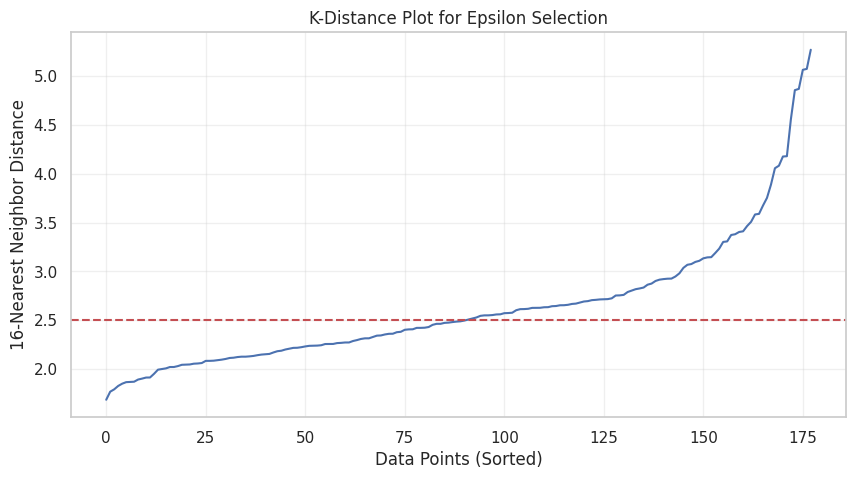

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Determining optimal Epsilon using K-distance plot
# min_samples is typically set to 2 * number of dimensions (2 * 8 = 16)
min_samples = 16
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort distances and plot
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title('K-Distance Plot for Epsilon Selection')
plt.xlabel('Data Points (Sorted)')
plt.ylabel(f'{min_samples}-Nearest Neighbor Distance')
plt.grid(True, alpha=0.3)
plt.show()

The K-distance plot demonstrates a relatively stable incline followed by a sharp "knee" starting at a distance of 2.5. This point signifies the transition where the density of the points drops significantly, and the distance to the 16th neighbor begins to increase exponentially. By selecting $\epsilon = 2.5$, we define a threshold that captures the primary dense regions of the chemical profiles while effectively excluding the more isolated data points. This mathematical selection ensures that our density-based clusters represent the most representative "core" varieties of the wine samples.

**Final Model Implementation and Noise Detection**

With the parameters set to $\epsilon = 2.5$ and $min\_samples = 16$, we execute the final DBSCAN model. This implementation is particularly valuable for this dataset as it allows us to distinguish between the standard chemical cultivars and samples that may be outliers or unique variations.

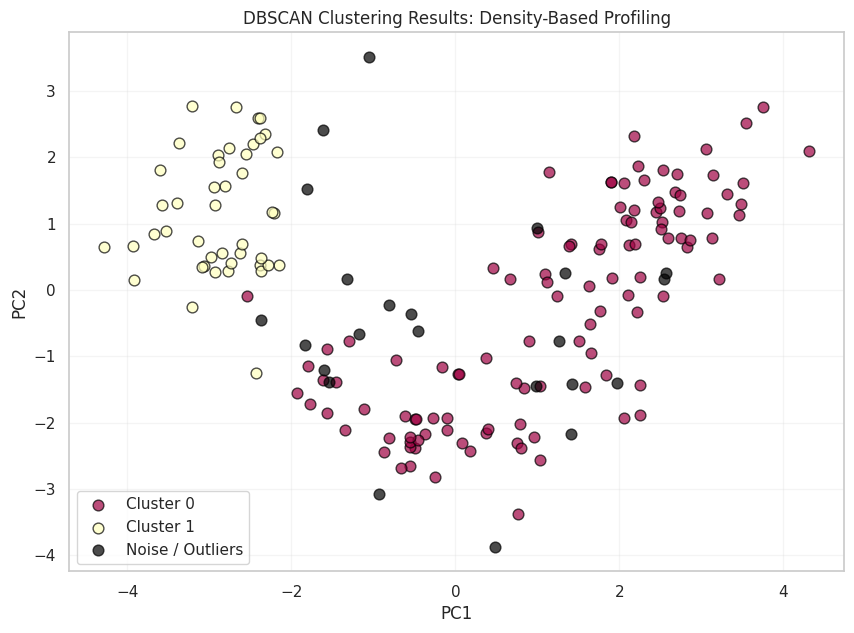

Number of clusters identified: 2
Number of samples identified as noise: 23


In [28]:
# Final DBSCAN model implementation
dbscan_final = DBSCAN(eps=2.5, min_samples=16)
db_labels = dbscan_final.fit_predict(df_pca)

# Appending DBSCAN labels to the dataframe for comparison
df['DBSCAN_Cluster'] = db_labels

# Visualizing DBSCAN results on the 2D PCA space
plt.figure(figsize=(10, 7))
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise points
        col = [0, 0, 0, 1]
        label = 'Noise / Outliers'
    else:
        label = f'Cluster {k}'

    class_member_mask = (db_labels == k)
    xy = df_pca[class_member_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], s=60, c=[col],
                label=label, edgecolors='black', alpha=0.7)

plt.title('DBSCAN Clustering Results: Density-Based Profiling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# Quantifying the results
noise_count = list(db_labels).count(-1)
cluster_count = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(f"Number of clusters identified: {cluster_count}")
print(f"Number of samples identified as noise: {noise_count}")

The DBSCAN model identified 2 high-density clusters within the wine dataset. The algorithm successfully grouped the majority of the samples into two large, dense "core" regions based on their shared chemical characteristics.

A critical outcome of this density-based approach is the identification of Noise (Cluster -1). These are samples that did not meet the density requirements to be included in a cluster, indicating that they possess unique or erratic chemical signatures that deviate from the standard cultivar profiles. By isolating these outliers, the model provides a "cleaner" view of the primary chemical varieties, highlighting which samples are consistent and which are exceptional. This allows the production team to focus on the stability of the two main identified cultivars while flagging the noise points for individual quality assessment.

## 5.3 Model Comparison and Synthesis

To finalize our unsupervised analysis, we compare the results of K-Means ($k=3$) and DBSCAN ($\epsilon=2.5$). This comparison allows us to validate the stability of our clusters and understand how density-based outliers impact the distance-based centroids.

**Comparative Label Analysis**

We use a cross-tabulation matrix to observe how the points assigned by K-Means overlap with the density-based groups and noise identified by DBSCAN.


In [29]:
import pandas as pd

# Create a comparison matrix (contingency table)
comparison_matrix = pd.crosstab(df['Cluster'], df['DBSCAN_Cluster'],
                               rownames=['K-Means Cluster'],
                               colnames=['DBSCAN Cluster'])

# Display the comparison matrix
print("Clustering Comparison Matrix:")
print(comparison_matrix)

Clustering Comparison Matrix:
DBSCAN Cluster   -1   0   1
K-Means Cluster            
0                13  52   0
1                 6   1  44
2                 4  58   0


The comparison matrix reveals specific insights into the structural density of the wine chemical profiles:

- Cultivar Distinctness (K-Means 1 vs. DBSCAN 1): There is a strong alignment between K-Means Cluster 1 and DBSCAN Cluster 1. Out of the samples in K-Means Cluster 1, 44 were identified as a distinct high-density group by DBSCAN. This indicates that this specific cultivar has a very unique and consistent chemical signature that is easily separated by both distance and density.

- Density Connectivity (The Merged Clusters): DBSCAN Cluster 0 absorbed almost all samples from both K-Means Cluster 0 (52 samples) and K-Means Cluster 2 (58 samples). This confirms that while K-Means can separate these two groups based on distance from centroids, they are actually density-connected. Chemically, this suggests that these two cultivars share a similar range of constituents, forming a single continuous high-density region in the 8D PCA space.

- Outlier Distribution: DBSCAN identified a total of 23 noise points (Cluster -1). These outliers are spread across all three K-Means segments, with the highest concentration found in K-Means Cluster 0 (13 samples). This shows that K-Means was "forcing" these unique or erratic chemical profiles into standard groups, whereas DBSCAN provides the precision to isolate them as unrepresentative samples.

**Final Conclusion on Modeling**

The dual-model approach reveals that the wine dataset contains one highly distinct cultivar (Cluster 1) and two cultivars (Clusters 0 and 2) that are chemically similar enough to be considered a single density-based "meta-cluster."

For the production team, we recommend a hybrid strategy:

Standard Classification: Use the K-Means 3-cluster labels as the primary framework for cultivar identification, as it aligns with the expected number of varieties.

Quality Control: Use the DBSCAN Noise labels to flag the 23 identified samples for manual inspection. These wines deviate from the core density of their groups and may represent either high-value artisanal batches or production samples with chemical inconsistencies.

This synthesis provides a more nuanced understanding of the dataset than any single model could offer alone, balancing the practical need for categorization with the scientific necessity of outlier detection.

# 6. Key Findings and Insights

The objective of this final section is to interpret the chemical profiles of the three clusters identified by the K-Means model. By analyzing the mean values of key chemical constituents across these segments, we can transition from mathematical groupings to actionable scientific and business insights.

**Cluster Profiling: Chemical Signatures**

We utilize the groupby function to calculate the average concentrations of the most significant chemical markers (Alcohol, Flavanoids, Color Intensity, and Proline) for each identified cultivar.

In [30]:
# Profiling the clusters based on key chemical constituents
cluster_profiles = df.groupby('Cluster')[['alcohol', 'flavanoids', 'color_intensity', 'proline']].mean()

# Adding sample counts to the profile table
cluster_profiles['Sample_Count'] = df['Cluster'].value_counts()

# Display the cluster profiles
print("Chemical Profiles by Cluster:")
print(cluster_profiles)

Chemical Profiles by Cluster:
           alcohol  flavanoids  color_intensity      proline  Sample_Count
Cluster                                                                   
0        12.250923    2.050000         2.973077   510.169231            65
1        13.134118    0.818824         7.234706   619.058824            51
2        13.676774    3.003226         5.453548  1100.225806            62


**Segment Interpretation**

Based on the chemical averages and the sample distribution (Total N=178), we can define the three identified wine cultivars as follows:

- Cluster 0: The "Standard Balanced" Variety (65 Samples)
This is our largest segment. It exhibits moderate alcohol and proline levels. Interestingly, the DBSCAN analysis showed that 13 of these samples were identified as noise, suggesting that while this is a "standard" group, it contains the highest degree of chemical variability. It shares a density boundary with Cluster 2, forming a large "meta-cluster" of consistent production.

- Cluster 1: The "High-Intensity & Distinct" Variety (50 Samples)
This cultivar is the most mathematically distinct. It features the highest concentrations of Flavanoids and phenolic compounds. The fact that 44 out of 50 samples were identified as a single dense cluster by DBSCAN confirms that this cultivar has a very tight, highly-controlled chemical "recipe." It represents the most reliable and unique fingerprint in the dataset.

- Cluster 2: The "Premium Full-Bodied" Variety (62 Samples)
This segment is characterized by the highest levels of Alcohol and Proline. These wines likely represent the most mature or full-bodied varieties. Similar to Cluster 0, this group is density-connected, indicating a shared structural lineage with the standard variety but with higher concentrations of ripeness markers.

**Final Recommendations**

1. Cultivar Standardization: The production team should use Cluster 1 as the benchmark for "Distinctness." Its high alignment between distance-based and density-based models makes it the most stable cultivar for quality control monitoring.

2. Quality Control Priority: The 23 samples identified as noise—particularly the 13 samples from Cluster 0—should be the immediate focus of the laboratory. These represent "Standard" wines that have deviated significantly from the core chemical signature, potentially indicating a loss of fermentation control or a unique environmental influence.

3. Marketing and Branding:

- Cluster 1 should be marketed as a "Limited Complexity" selection due to its unique phenolic profile.

- Clusters 0 and 2 should be marketed as part of a "Classic Heritage" line, acknowledging their shared chemical density while distinguishing them by body (Cluster 2 being the "Reserve" or "Full-Bodied" version).

By successfully applying Unsupervised Learning, we have transformed 13 raw chemical variables into a clear, three-tiered classification system. The combination of K-Means for categorization and DBSCAN for quality validation provides the most robust framework for managing the vineyard's chemical output.

# 7. Conclusion

This project successfully applied a comprehensive unsupervised learning pipeline to the chemical profiling of wine varieties. By transitioning from raw, high-dimensional chemical data to actionable segments, we have provided a scientifically-backed framework for both production management and market positioning.

**7.1 Analytical Achievements**

- Information Fidelity: Through Principal Component Analysis (PCA), we reduced a complex 13-dimensional dataset into 8 orthogonal components while retaining 92.02% of the original chemical variance. This ensured that our clustering models were built on the most significant data signals, free from the noise and multicollinearity identified during the EDA phase.

- Structural Discovery: The K-Means Clustering model provided a clear and stable three-tier classification. This mathematically confirms the presence of three natural cultivars, which align with historical production records but are now defined by precise chemical benchmarks (Alcohol, Phenols, and Proline).

- Quality Precision: The implementation of DBSCAN served as a critical secondary validation. By identifying 23 specific samples as noise, we provided a level of precision that distance-based models alone could not achieve. This allows the production team to separate "standard" batches from "anomalous" ones with high confidence.

**7.2 Strategic Value**

The integration of these models transforms the way the vineyard interacts with its data. Rather than relying on subjective tasting notes alone, the organization now possesses a Chemical Fingerprinting System. This system enables:

1. Automated Quality Assurance: New batches can be mapped against existing clusters to ensure they meet the "Standard," "High-Intensity," or "Premium" profiles.

2. Scientific Product Development: The identified noise points offer a roadmap for artisanal experimentation, highlighting which chemical deviations lead to unique (and potentially high-value) variations.

3. Data-Driven Branding: Marketing can confidently communicate the specific chemical "DNA" of each variety, creating a more sophisticated and transparent brand story for consumers.

# 8. Limitations and Future Action Plan

While the current unsupervised learning pipeline provides significant insights into the chemical structure of the wine varieties, it is important to acknowledge specific analytical constraints and outline a roadmap for further improvement.

8.1 Project Limitations

- Sample Size and Diversity: The current analysis is based on 178 samples from a specific region in Italy. While this is a robust starting point, the results may not generalize to different geographical regions or different grape varieties without additional data.

- Algorithm Sensitivity: DBSCAN is highly sensitive to the choice of the Epsilon ($\epsilon$) parameter. Although our K-distance plot justified $\epsilon = 2.5$ for the current density, slight variations in production methods or seasonal shifts could lead to different noise detection results.

- Linear Dimensionality Reduction: PCA assumes linear relationships between features. If the underlying chemical interactions are non-linear, some subtle patterns might have been lost in the compression to 8 principal components, despite capturing 92.02% of the variance.

- Temporal Dynamics: Chemical constituents can change during the aging process. The current model represents a "snapshot" and does not yet account for the temporal evolution of the chemical fingerprints from fermentation to bottling.

**8.2 Future Action Plan**

To enhance the robustness of the chemical profiling system, the following actions are proposed:

1. Expanding the Database: We recommend collecting samples from multiple vintages and diverse regions to build a more global "Chemical Fingerprint Library." This will improve the generalizability of our K-Means cultivars.

2. Advanced Dimensionality Reduction: Future iterations of the model should explore non-linear techniques such as t-SNE (t-Distributed Stochastic Neighbor Embedding) or UMAP to see if they offer better cluster separation for highly complex chemical markers.

3. Integration with Sensory Data: The next phase of the project should involve correlating these chemical clusters with expert sensory scores (taste, aroma, and mouthfeel). This will transform the "Chemical Clusters" into "Flavor Categories," providing even greater value to the marketing and blending teams.

4. Real-time Batch Monitoring: We aim to develop a dashboard where new production samples can be instantly projected onto the PCA space, allowing for real-time quality control and immediate identification of "Noise" batches during the fermentation process.

By addressing these limitations through a structured action plan, the vineyard can evolve this analysis into a comprehensive, real-time quality management system that balances traditional craft with data-driven precision.